## Basic statistics

In [2]:
import numpy as np
import pandas as pd
Train_df = pd.read_csv('./we_data/train.csv')
Valid_df = pd.read_csv('./we_data/validation.csv')
Test_df = pd.read_csv('./we_data/test.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def basicstat(df):
    rt = pd.DataFrame(columns=['Imps','Clicks','Cost','CTR','CPM','eCPC'])
    Imps = df.shape[0]
    Clicks = sum(df.click)
    Cost = sum(df.payprice)
    CTR = Clicks/Imps
    CPM = Cost/Imps*1000
    eCPC = Cost/Clicks
    
    rt.loc[0,'Imps']=Imps
    rt.loc[0,'Clicks']=Clicks
    rt.loc[0,'Cost']=Cost
    rt.loc[0,'CTR']=CTR
    rt.loc[0,'CPM']=CPM
    rt.loc[0,'eCPC']=eCPC
    print(rt)
    
    return rt

In [5]:
def basicstat2(df):
    rt = pd.DataFrame(columns=['Imps','Clicks','Cost','CTR','CPM','eCPC'])
    Imps = df.shape[0]
#     Clicks = sum(df.click)
#     Cost = sum(df.payprice)
#     CTR = Clicks/Imps
#     CPM = Cost/Imps*1000
#     eCPC = Cost/Clicks
    
    rt.loc[0,'Imps']=Imps
#     rt.loc[0,'Clicks']=Clicks
#     rt.loc[0,'Cost']=Cost
#     rt.loc[0,'CTR']=CTR
#     rt.loc[0,'CPM']=CPM
#     rt.loc[0,'eCPC']=eCPC
    
    return rt

In [6]:
Train_df.head()

click  weekday  hour                                     bidid  \
0      0        5    22  b7bea80521fdecd95d2d761a38c91c3f09618066   
1      0        1    20  4f51205475678f5a124bc76b2c54163bf8eaa7eb   
2      0        3    13  b604e3fd054a658ab7ced4285ebf2ef54d2bd890   
3      0        6    23  0348beeae93e561584c3b50fc9e7746a33048ad7   
4      0        5     6  268149c1789bce2bc9798ffd97ec431219bafeb3   

                                     userid       useragent             IP  \
0  2e880fb7d690cf7377b2e42e701728e3f3c0e4c1      windows_ie   125.37.175.*   
1  3a1fe01360ff8100e7d006b83b77a3e4c01d928c  windows_chrome    171.36.92.*   
2  801d18a056b6fe6b06a794aef17fb0d6daff2414      windows_ie    59.46.106.*   
3  0d6eaf2259699990e38a1fc5116f112070b9ecdc      windows_ie  114.250.226.*   
4  a239d9bb642460d974ba67f85e63b8d3e214da0e      windows_ie   183.63.192.*   

   region  city adexchange           ...            slotheight slotvisibility  \
0       2     2          2           ...                   200              2   
1     238   239          1           ...                   250     FourthView   
2      40    41          2           ...                   250              2   
3       1     1          1           ...                   600              2   
4     216   233          2           ...                    90      OtherView   

  slotformat slotprice                          creative  bidprice payprice  \
0          0         5  a4f763f78ef3eedfe614263b94a8924e       238        5   
1         Na         0                             10722       294       23   
2          0         5  798b2d49952d77f1eace9f23c210d0b5       238       24   
3          1         0  cb7c76e7784031272e37af8e7e9b062c       300       25   
4         Na       133                              7330       277      133   

                            keypage  advertiser                  usertag  
0  0f951a030abdaedd733ee8d114ce2944        3427                     null  
1                              null        2821                     null  
2  0f951a030abdaedd733ee8d114ce2944        3427  10052,10006,13866,10110  
3  bebefa5efe83beee17a3d245e7c5085b        1458        13866,10063,10111  
4                              null        2259                     null  

[5 rows x 25 columns]

In [7]:
Train_df.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [17]:
#divid into advertiser
def divid_to_adv(df):
    result = []
    for advertise in df['advertiser'].unique(): 
        result.append(df[df['advertiser'] == advertise])
    return result   

In [185]:
Train_df['advertiser'].unique()[7]

2261

In [19]:
train_advs = divid_to_adv(Train_df)

In [8]:
basicstat(Train_df)

      Imps Clicks       Cost          CTR      CPM    eCPC
0  2430981   1793  189984608  0.000737562  78151.4  105959


Imps Clicks       Cost          CTR      CPM    eCPC
0  2430981   1793  189984608  0.000737562  78151.4  105959

In [9]:
basicstat(Valid_df)

     Imps Clicks      Cost          CTR    CPM    eCPC
0  303925    202  23777270  0.000664638  78234  117709


Imps Clicks      Cost          CTR    CPM    eCPC
0  303925    202  23777270  0.000664638  78234  117709

In [10]:
basicstat2(Test_df)

Imps Clicks Cost  CTR  CPM eCPC
0  303375    NaN  NaN  NaN  NaN  NaN

In [210]:
nn = 'weekday'

In [211]:
# df = train_advs[8]
df = Train_df

In [212]:
cw_df = df.groupby(df[nn])

In [213]:
s = cw_df.sum()
s

click     hour    region      city  slotwidth  slotheight  slotprice  \
weekday                                                                         
0          271  6272831  63414089  65496752  221107058    85542470    9709658   
1          249  4836161  55398457  57213186  216108737    69651065    9953900   
2          286  3955181  42886740  44298317  174769892    53971670    7945079   
3          283  5259592  49647772  51331538  206165386    61468270   10003495   
4          264  4124529  46875732  48469009  196583364    58511030    9721344   
5          247  3846760  52322360  54065089  204102908    62338090    9511409   
6          193  4497046  52602787  54298212  184864143    66932995    8105640   

          bidprice  payprice  advertiser  
weekday                                   
0        116716779  32204115  1187950023  
1        101523210  30284921  1046761367  
2         80703473  23727961   859728460  
3         90700842  25993847   987771415  
4         88542286  25317709   929878713  
5         92975773  27183974   934713285  
6         92403185  25272081   958971255

In [214]:
c = cw_df.count()
c

click    hour   bidid  userid  useragent      IP  region    city  \
weekday                                                                      
0        420955  420955  420955  420955     420955  420955  420955  420955   
1        368164  368164  368164  368164     368164  368164  368164  368164   
2        296438  296438  296438  296438     296438  296438  296438  296438   
3        339627  339627  339627  339627     339627  339627  339627  339627   
4        326018  326018  326018  326018     326018  326018  326018  326018   
5        340642  340642  340642  340642     340642  340642  340642  340642   
6        339137  339137  339137  339137     339137  339137  339137  339137   

         adexchange  domain   ...     slotheight  slotvisibility  slotformat  \
weekday                       ...                                              
0            420955  420955   ...         420955          420955      420955   
1            368164  368164   ...         368164          368164      368164   
2            296438  296438   ...         296438          296438      296438   
3            339627  339627   ...         339627          339627      339627   
4            326018  326018   ...         326018          326018      326018   
5            340642  340642   ...         340642          340642      340642   
6            339137  339137   ...         339137          339137      339137   

         slotprice  creative  bidprice  payprice  keypage  advertiser  usertag  
weekday                                                                         
0           420955    420955    420955    420955   420955      420955   420955  
1           368164    368164    368164    368164   368164      368164   368164  
2           296438    296438    296438    296438   296438      296438   296438  
3           339627    339627    339627    339627   339627      339627   339627  
4           326018    326018    326018    326018   326018      326018   326018  
5           340642    340642    340642    340642   340642      340642   340642  
6           339137    339137    339137    339137   339137      339137   339137  

[7 rows x 24 columns]

In [215]:
ctr = s.click/c.click
ctr

weekday
0    0.000644
1    0.000676
2    0.000965
3    0.000833
4    0.000810
5    0.000725
6    0.000569
Name: click, dtype: float64

In [216]:
inxx = s.reset_index()
inx = inxx[nn]
inx

0    0
1    1
2    2
3    3
4    4
5    5
6    6
Name: weekday, dtype: int64

In [217]:
df = train_advs[7]
# df = Train_df

In [218]:
cw_df = df.groupby(df[nn])

In [219]:
s = cw_df.sum()
s

click    hour   region     city  slotwidth  slotheight  slotprice  \
weekday                                                                      
3            8  401472  3435408  3541910   11456392     6086840     619515   
4           10  356397  4685468  4828603   16045690     7841800     865408   
5           12  372183  4758640  4906297   17928442     6712320     988588   
6            6  187479  2485268  2561148    9466678     3330680     513875   

         bidprice  payprice  advertiser  
weekday                                  
3         7152158   2036561    56088627  
4         9710781   3049423    76254486  
5         9756291   3271099    76731557  
6         5082469   1516696    39911172

In [220]:
c = cw_df.count()
c

click   hour  bidid  userid  useragent     IP  region   city  \
weekday                                                                 
3        24807  24807  24807   24807      24807  24807   24807  24807   
4        33726  33726  33726   33726      33726  33726   33726  33726   
5        33937  33937  33937   33937      33937  33937   33937  33937   
6        17652  17652  17652   17652      17652  17652   17652  17652   

         adexchange  domain   ...     slotheight  slotvisibility  slotformat  \
weekday                       ...                                              
3             24807   24807   ...          24807           24807       24807   
4             33726   33726   ...          33726           33726       33726   
5             33937   33937   ...          33937           33937       33937   
6             17652   17652   ...          17652           17652       17652   

         slotprice  creative  bidprice  payprice  keypage  advertiser  usertag  
weekday                                                                         
3            24807     24807     24807     24807    24807       24807    24807  
4            33726     33726     33726     33726    33726       33726    33726  
5            33937     33937     33937     33937    33937       33937    33937  
6            17652     17652     17652     17652    17652       17652    17652  

[4 rows x 24 columns]

In [221]:
ctr1 = s.click/c.click
ctr1

weekday
3    0.000322
4    0.000297
5    0.000354
6    0.000340
Name: click, dtype: float64

In [222]:
inxx = s.reset_index()
inx1 = inxx[nn]
inx1

0    3
1    4
2    5
3    6
Name: weekday, dtype: int64

In [223]:
df = train_advs[4]
# df = Train_df

In [224]:
cw_df = df.groupby(df[nn])

In [225]:
s = cw_df.sum()
s

click    hour    region      city  slotwidth  slotheight  slotprice  \
weekday                                                                        
0           53  975717  10206248  10541251   35864342    14053590    1770513   
1           44  856994   8951323   9248958   35734458    11135260    1878779   
2           47  873578   9080705   9385722   37475298    11350500    1850563   
3           42  830645   8931984   9239525   37932622    10871750    2062178   
4           48  928052   9446805   9776249   40217362    11791680    2096346   
5           52  830800   9106472   9416896   38800826    11175470    2050830   
6           34  974382  10297804  10630003   38289214    13122850    1714154   

         bidprice  payprice  advertiser  
weekday                                  
0        21258300   4787271   239935346  
1        18347700   4867197   207084374  
2        18947700   5187993   213856374  
3        18440400   4948435   208130648  
4        19756200   5236192   222981644  
5        18800400   5006923   212193848  
6        20961600   4897812   236586592

In [226]:
c = cw_df.count()
c

click   hour  bidid  userid  useragent     IP  region   city  \
weekday                                                                 
0        70861  70861  70861   70861      70861  70861   70861  70861   
1        61159  61159  61159   61159      61159  61159   61159  61159   
2        63159  63159  63159   63159      63159  63159   63159  63159   
3        61468  61468  61468   61468      61468  61468   61468  61468   
4        65854  65854  65854   65854      65854  65854   65854  65854   
5        62668  62668  62668   62668      62668  62668   62668  62668   
6        69872  69872  69872   69872      69872  69872   69872  69872   

         adexchange  domain   ...     slotheight  slotvisibility  slotformat  \
weekday                       ...                                              
0             70861   70861   ...          70861           70861       70861   
1             61159   61159   ...          61159           61159       61159   
2             63159   63159   ...          63159           63159       63159   
3             61468   61468   ...          61468           61468       61468   
4             65854   65854   ...          65854           65854       65854   
5             62668   62668   ...          62668           62668       62668   
6             69872   69872   ...          69872           69872       69872   

         slotprice  creative  bidprice  payprice  keypage  advertiser  usertag  
weekday                                                                         
0            70861     70861     70861     70861    70861       70861    70861  
1            61159     61159     61159     61159    61159       61159    61159  
2            63159     63159     63159     63159    63159       63159    63159  
3            61468     61468     61468     61468    61468       61468    61468  
4            65854     65854     65854     65854    65854       65854    65854  
5            62668     62668     62668     62668    62668       62668    62668  
6            69872     69872     69872     69872    69872       69872    69872  

[7 rows x 24 columns]

In [227]:
ctr2 = s.click/c.click
ctr2

weekday
0    0.000748
1    0.000719
2    0.000744
3    0.000683
4    0.000729
5    0.000830
6    0.000487
Name: click, dtype: float64

In [228]:
inxx = s.reset_index()
inx2 = inxx[nn]
inx2

0    0
1    1
2    2
3    3
4    4
5    5
6    6
Name: weekday, dtype: int64

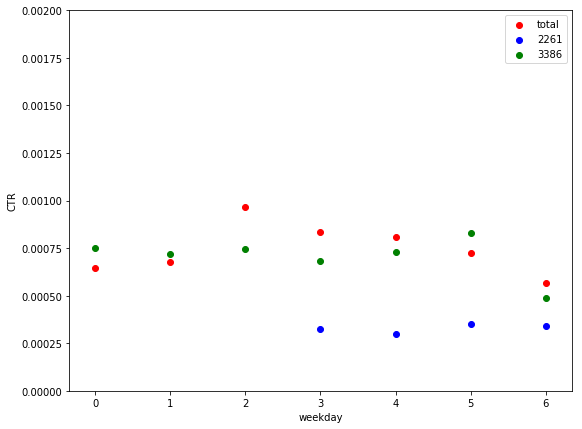

In [232]:
plt.figure(figsize = (9, 7))
plt.scatter(inx,ctr,color="red",  label = 'total')
plt.scatter(inx1,ctr1,color="blue",  label = '2261')
plt.scatter(inx2,ctr2,color="green", label = '3386')
plt.ylim((0, 0.002))
# plt.xticks([-2, -1.8, -1, 1.22, 3],[r'$really\ bad$', r'$bad$', r'$normal$', r'$good$', r'$really\ good$'])

# plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel(nn)
plt.ylabel('CTR')
plt.legend()

plt.show()

In [207]:
Train_df['advertiser'].unique()

array([3427, 2821, 1458, 2259, 3386, 3358, 3476, 2261, 2997])

In [24]:
len(Train_df['advertiser'].unique())

9

In [27]:
train_advs[8].head()

click  weekday  hour                                     bidid  \
93       0        4    22  239feb443bbe8777637c477673d24e3395a658c9   
125      0        4    22  f228b986180c1d5ca8644917e8bf7fcdec865c3c   
150      0        2    16  cf8ba78a83a36611b2a076d6b04a77968c69e90e   
183      0        3    16  9a44cf2a3f8108240285cb9c3131541fcf22da87   
197      0        3    15  16b4cd05d03cb1e79019102e36c723a736ae3db0   

                                       userid       useragent             IP  \
93   25f7ae040e60956f83b36d52a1b2a77e86d3cf6c  android_safari   112.96.165.*   
125  e77fedf5ed0ff9751ab355de1e6f2832b16a4e3a  android_safari  124.163.207.*   
150  1dfb230a1fa6145eba1b6b31f6416c1947ff9fd3  android_safari   182.40.153.*   
183  2c67940c15bd4510626dc2e6cb46934ebea1b02d  android_safari    218.77.90.*   
197  5345e519f0b47883c916759c3e184f4f66d722d0  android_safari   110.17.239.*   

     region  city adexchange   ...   slotheight slotvisibility slotformat  \
93      216   217       null   ...           50      FirstView         Na   
125      15    24       null   ...           50      FirstView         Na   
150     146   148       null   ...           50      FirstView         Na   
183     201   210       null   ...           50      FirstView         Na   
197      27    28       null   ...           50      FirstView         Na   

    slotprice  creative  bidprice payprice keypage  advertiser usertag  
93         41     12987       277       41    null        2997    null  
125         6     12987       277       61    null        2997    null  
150         6     11908       277        6    null        2997    null  
183         6     11908       277       36    null        2997    null  
197        29     11908       277       33    null        2997    null  

[5 rows x 25 columns]

In [ ]:
# Plot total kills by weapon for the top ranked players 
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df_rank18['weapon_name'], df_rank18['total_kills_in_mils'],'mo',label='rank18')
ax.plot(df_rank17['weapon_name'], df_rank17['total_kills_in_mils'],'ro',label='rank17')
ax.plot(df_rank16['weapon_name'], df_rank16['total_kills_in_mils'],'ko',label='rank16')
ax.plot(df_rank15['weapon_name'], df_rank15['total_kills_in_mils'],'yo',label='rank15')
ax.plot(df_rank14['weapon_name'], df_rank14['total_kills_in_mils'],'bo',label='rank14')

plt.ylabel('Total_kills in millions by weapons')
plt.xlabel('Weapon Types')
 
leg = ax.legend()
plt.show()

In [1]:
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 5))

sns.distplot(pearson_unrelated, kde=False,  bins=100, color="skyblue",  label = 'Unrelated')
sns.distplot(pearson_discuss, kde=False,  bins=100, color="orange",  label = 'Discuss')
sns.distplot(pearson_agree, kde=False,  bins=100, color="olive", label='Agree')
sns.distplot(pearson_disagree, kde=False,  bins=100, color="red", label = 'Disagree')

plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel('Pearson Correlation Coefficients')
plt.ylabel('Frequency')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

## Advertiser

In [4]:
#divid into advertiser
def divid_to_adv(df):
    result = []
    for advertise in df['advertiser'].unique(): 
        result.append(df[df['advertiser'] == advertise])
    return result   

In [6]:
Train_df['advertiser'].unique()

array([3427, 2821, 1458, 2259, 3386, 3358, 3476, 2261, 2997])

In [22]:
train_advs = divid_to_adv(Train_df)

In [14]:
for adv in train_advs:
    basicstat(adv)

     Imps Clicks      Cost          CTR      CPM    eCPC
0  402806    272  30458711  0.000675263  75616.3  111981
     Imps Clicks      Cost          CTR      CPM    eCPC
0  211366    131  18828044  0.000619778  89077.9  143726
     Imps Clicks      Cost          CTR      CPM     eCPC
0  492353    385  33968736  0.000781959  68992.6  88230.5
     Imps Clicks      Cost          CTR      CPM    eCPC
0  133673     43  12428238  0.000321681  92974.9  289029
     Imps Clicks      Cost          CTR      CPM    eCPC
0  455041    320  34931823  0.000703233  76766.3  109162
     Imps Clicks      Cost          CTR      CPM    eCPC
0  264956    202  22447231  0.000762391  84720.6  111125
     Imps Clicks      Cost          CTR      CPM    eCPC
0  310835    187  23918779  0.000601605  76950.1  127908
     Imps Clicks     Cost         CTR      CPM    eCPC
0  110122     36  9873779  0.00032691  89662.2  274272
    Imps Clicks     Cost         CTR      CPM     eCPC
0  49829    217  3129267  0.0043548

In [16]:
valid_advs = divid_to_adv(Valid_df)

In [7]:
Valid_df['advertiser'].unique()

array([1458, 3476, 3358, 3427, 3386, 2261, 2821, 2259, 2997])

In [17]:
for adv in valid_advs:
    basicstat(adv)

    Imps Clicks     Cost          CTR      CPM     eCPC
0  62353     49  4294602  0.000785848  68875.6  87644.9
    Imps Clicks     Cost          CTR      CPM    eCPC
0  38841     11  2993751  0.000283206  77077.1  272159
    Imps Clicks     Cost         CTR      CPM    eCPC
0  32939     23  2794021  0.00069826  84824.1  121479
    Imps Clicks     Cost          CTR      CPM    eCPC
0  50183     37  3776735  0.000737301  75259.3  102074
    Imps Clicks     Cost          CTR    CPM    eCPC
0  56665     28  4350793  0.000494132  76781  155385
    Imps Clicks     Cost          CTR      CPM    eCPC
0  13550      3  1214876  0.000221402  89658.7  404959
    Imps Clicks     Cost          CTR      CPM    eCPC
0  26503     23  2394900  0.000867826  90363.4  104126
    Imps Clicks     Cost          CTR      CPM    eCPC
0  16715      2  1568808  0.000119653  93856.3  784404
   Imps Clicks    Cost         CTR      CPM     eCPC
0  6176     26  388784  0.00420984  62950.8  14953.2


distribution

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Plot the frequency distribution (Pearson Correlation Coefficient)
plt.figure(figsize = (10, 5))

sns.distplot(pearson_unrelated, kde=False,  bins=100, color="skyblue",  label = 'Unrelated')
sns.distplot(pearson_discuss, kde=False,  bins=100, color="orange",  label = 'Discuss')
sns.distplot(pearson_agree, kde=False,  bins=100, color="olive", label='Agree')
sns.distplot(pearson_disagree, kde=False,  bins=100, color="red", label = 'Disagree')

plt.title('The Distribution of the Pearson Correlation Coefficients for the Four Class')
plt.xlabel('Pearson Correlation Coefficients')
plt.ylabel('Frequency')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
Train_df['payprice']

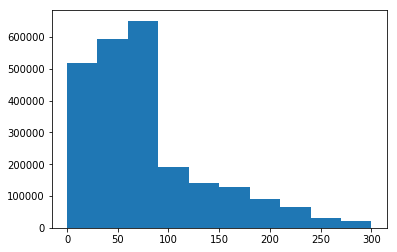

In [30]:
plt.hist(Train_df['payprice'])
plt.show()

In [33]:
tf1 = Train_df[Train_df['click'] == 1]
tf0 = Train_df[Train_df['click'] == 0]

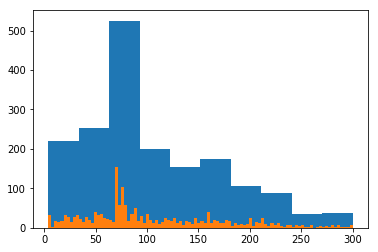

In [37]:
plt.hist(tf1['payprice'],bins = 100)
plt.show()

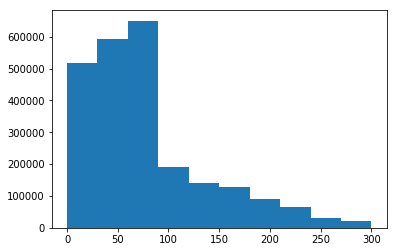

In [35]:
plt.hist(tf0['payprice'])
plt.show()

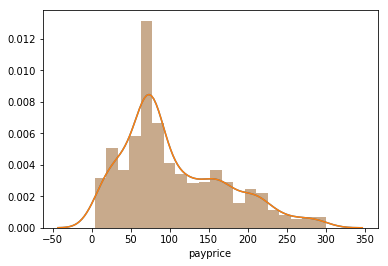

In [40]:
sns.distplot(tf1['payprice'])
plt.show()

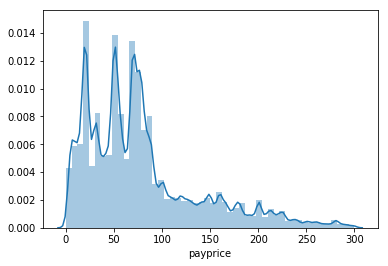

In [41]:
sns.distplot(tf0['payprice'])
plt.show()

In [45]:
tf1.describe()

click      weekday         hour       region         city  \
count  1793.0  1793.000000  1793.000000  1793.000000  1793.000000   
mean      1.0     2.854992    14.539877   147.424986   152.046849   
std       0.0     1.929606     6.472012   104.424529   105.349122   
min       1.0     0.000000     0.000000     0.000000     0.000000   
25%       1.0     1.000000    11.000000    79.000000    79.000000   
50%       1.0     3.000000    16.000000   146.000000   148.000000   
75%       1.0     4.000000    19.000000   216.000000   220.000000   
max       1.0     6.000000    23.000000   394.000000   399.000000   

         slotwidth   slotheight    slotprice     bidprice     payprice  \
count  1793.000000  1793.000000  1793.000000  1793.000000  1793.000000   
mean    555.631344   175.156163    31.026771   273.226994   105.464027   
std     315.751387   129.306306    42.119348    28.488588    66.392258   
min     120.000000    50.000000     0.000000   227.000000     4.000000   
25%     300.000000    90.000000     0.000000   241.000000    61.000000   
50%     336.000000    90.000000     5.000000   277.000000    84.000000   
75%     960.000000   250.000000    70.000000   300.000000   151.000000   
max    1000.000000   600.000000   280.000000   300.000000   300.000000   

        advertiser  
count  1793.000000  
mean   2846.489124  
std     778.544333  
min    1458.000000  
25%    2261.000000  
50%    3358.000000  
75%    3427.000000  
max    3476.000000

In [46]:
tf0.describe()

click       weekday          hour        region          city  \
count  2429188.0  2.429188e+06  2.429188e+06  2.429188e+06  2.429188e+06   
mean         0.0  2.888581e+00  1.348847e+01  1.493847e+02  1.543312e+02   
std          0.0  2.055313e+00  6.567114e+00  1.020614e+02  1.033078e+02   
min          0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%          0.0  1.000000e+00  1.000000e+01  7.900000e+01  7.900000e+01   
50%          0.0  3.000000e+00  1.400000e+01  1.460000e+02  1.520000e+02   
75%          0.0  5.000000e+00  1.900000e+01  2.160000e+02  2.220000e+02   
max          0.0  6.000000e+00  2.300000e+01  3.950000e+02  3.990000e+02   

          slotwidth    slotheight     slotprice      bidprice      payprice  \
count  2.429188e+06  2.429188e+06  2.429188e+06  2.429188e+06  2.429188e+06   
mean   5.774379e+02  1.885822e+02  2.671464e+01  2.729619e+02  7.813126e+01   
std    3.216776e+02  1.314957e+02  3.704026e+01  2.891185e+01  5.983667e+01   
min    1.200000e+02  5.000000e+01  0.000000e+00  2.270000e+02  0.000000e+00   
25%    3.000000e+02  9.000000e+01  0.000000e+00  2.410000e+02  3.300000e+01   
50%    3.360000e+02  9.000000e+01  5.000000e+00  2.940000e+02  6.800000e+01   
75%    9.600000e+02  2.500000e+02  5.000000e+01  3.000000e+02  9.900000e+01   
max    1.000000e+03  6.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02   

         advertiser  
count  2.429188e+06  
mean   2.840731e+03  
std    7.842034e+02  
min    1.458000e+03  
25%    2.259000e+03  
50%    3.358000e+03  
75%    3.427000e+03  
max    3.476000e+03

In [47]:
max(tf0['payprice'])

300

In [48]:
from sklearn.externals import joblib
model = joblib.load('XGBoost_Sample10_click179.sav')

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.19.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
